# Human Activity Recognition

Human activity recognition, or HAR for short, is a broad field of study concerned with identifying the specific movement or action of a person based on sensor data. 

Movements are often typical activities performed indoors, such as walking, talking, standing, and sitting. They may also be more focused activities such as those types of activities performed in a kitchen or on a factory floor.

The sensor data may be remotely recorded, such as video, radar, or other wireless methods. Alternately, data may be recorded directly on the subject such as by carrying custom hardware or smart phones that have accelerometers and gyroscopes.

<img src= https://repository-images.githubusercontent.com/284708744/60f0a800-ec73-11ea-9c98-1061b5545d29 width=600 align='center'/>

## Word about used sensors

<img src=https://www.researchgate.net/publication/331320409/figure/fig1/AS:730142297055233@1551090897363/Orientation-of-the-axes-relative-to-a-typical-smartphone-device-using-a-gyroscope-sensor.png width=500/>

* <b>Accelerometers</b> is an electronic sensor that measures the acceleration forces acting on an object, in order to determine the object’s position in space and monitor the object’s movement
* <b>Gyroscope</b>  is a device that can measure and maintain the orientation and angular velocity of an object. These are more advanced than accelerometers. These can measure the tilt and lateral orientation of the object whereas accelerometer can only measure the linear motion.

# Word about the dataset

The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.

<img src = https://storage.googleapis.com/kaggle-datasets-images/226/478/11ff0be5a773e73886c3da626349e8f0/dataset-cover.jpeg width=600/>

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.




---


## Attribute Information:

For each record in the dataset it is provided:
- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
- Triaxial Angular velocity from the gyroscope.
- A 561-feature vector with time and frequency domain variables.
- Its activity label.
- An identifier of the subject who carried out the experiment.
### Main features

'-XYZ' is used to denote 3-axial signals in the X, Y and Z directions.

* tBodyAcc-XYZ
* tGravityAcc-XYZ
* tBodyAccJerk-XYZ
* tBodyGyro-XYZ
* tBodyGyroJerk-XYZ
* tBodyAccMag
* tGravityAccMag
* tBodyAccJerkMag
* tBodyGyroMag
* tBodyGyroJerkMag
* fBodyAcc-XYZ
* fBodyAccJerk-XYZ
* fBodyGyro-XYZ
* fBodyAccMag
* fBodyAccJerkMag
* fBodyGyroMag
* fBodyGyroJerkMag


### The set of variables that were estimated from these signals are: 

* **mean()**: Mean value
* **std()**: Standard deviation
* **mad()**: Median absolute deviation 
* **max()**: Largest value in array
* **min()**: Smallest value in array
* **sma()**: Signal magnitude area
* **energy()**: Energy measure. Sum of the squares divided by the number of values. 
* **iqr()**: Interquartile range 
* **entropy()**: Signal entropy
* **arCoeff()**: Autorregresion coefficients with Burg order equal to 4
* **correlation()**: correlation coefficient between two signals
* **maxInds()**: index of the frequency component with largest magnitude
* **meanFreq()**: Weighted average of the frequency components to obtain a mean frequency
* **skewness()**: skewness of the frequency domain signal 
* **kurtosis()**: kurtosis of the frequency domain signal 
* **bandsEnergy()**: Energy of a frequency interval within the 64 bins of the FFT of each window.
* **angle()**: Angle between to vectors.


## Importing necessary libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from  sklearn.decomposition import  PCA
from sklearn import preprocessing
from sklearn import tree
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split


pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline 

## Exploring the dataset

In [2]:
train_data = pd.read_csv("../input/human-activity-recognition-with-smartphones/train.csv")
test_data = pd.read_csv("../input/human-activity-recognition-with-smartphones/test.csv")

In [3]:
train_data.shape

(7352, 563)

In [4]:
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [5]:
train_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

# Data Cleaning

<img src = https://daxg39y63pxwu.cloudfront.net/images/blog/data-cleaning-in-python/data-cleaning-in-python.png width=600/>

**Data cleaning** is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled. If data is incorrect, outcomes and algorithms are unreliable, even though they may look correct. There is no one absolute way to prescribe the exact steps in the data cleaning process because the processes will vary from dataset to dataset. 

## 1- Checking dublicates

In [6]:
print("number of duplicates = " + str(train_data.duplicated().sum()))

number of duplicates = 0


## 2- Checking missing values

In [7]:
print(train_data.isna().sum())

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64


### **conclusion**
* it seems that we don't have any duplicates
* from these results we now sure that there is no missing values


# Exploratory Data Analysis

## 1- Which Sensor Is More Important For Classifying Participants By Walking Style?

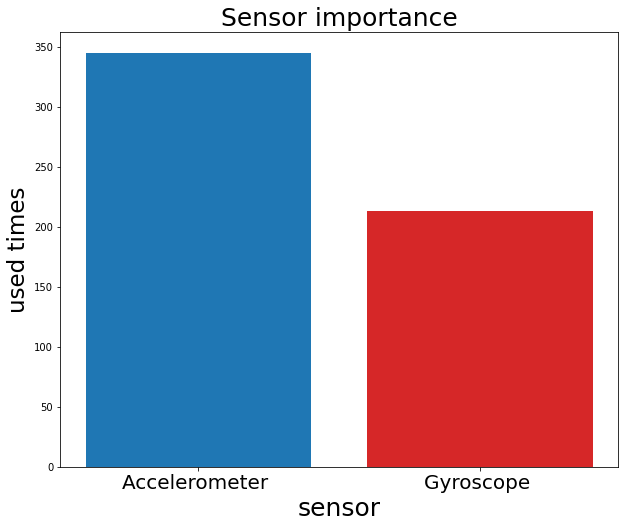

In [8]:
Acc=0
Gyro=0
other=0 
for i in train_data.columns:
    if'Acc'in i:
        Acc += 1
    elif'Gyro'in i:
        Gyro += 1
    else:
        other += 1
        
plt.figure(figsize=(10, 8))
plt.bar(x = ['Accelerometer ','Gyroscope '], height = [Acc,Gyro], color=['tab:blue', 'tab:red'])
plt.title("Sensor importance", fontsize = 25)
plt.xlabel("sensor", size=25)
plt.ylabel("used times", size=23)
plt.xticks(fontsize=20)
plt.show()

**the most used sensor is accelerometer so we will focis on it in modeling**

## 3- Exploring angle between x and gravity 

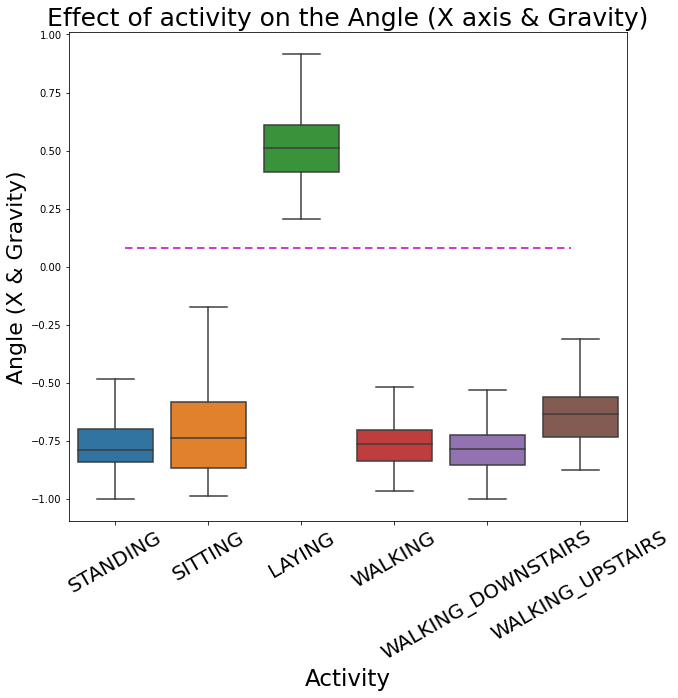

In [9]:
plt.figure(figsize=(10,9))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train_data, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Effect of activity on the Angle (X axis & Gravity)', fontsize=25)
plt.xlabel("Activity", size=23)
plt.ylabel('Angle (X & Gravity)', size=22)
plt.xticks(rotation = 30, fontsize = 20)
plt.show()

**Observations**:

* If angle(X,gravityMean) > 0 then Activity is Laying.

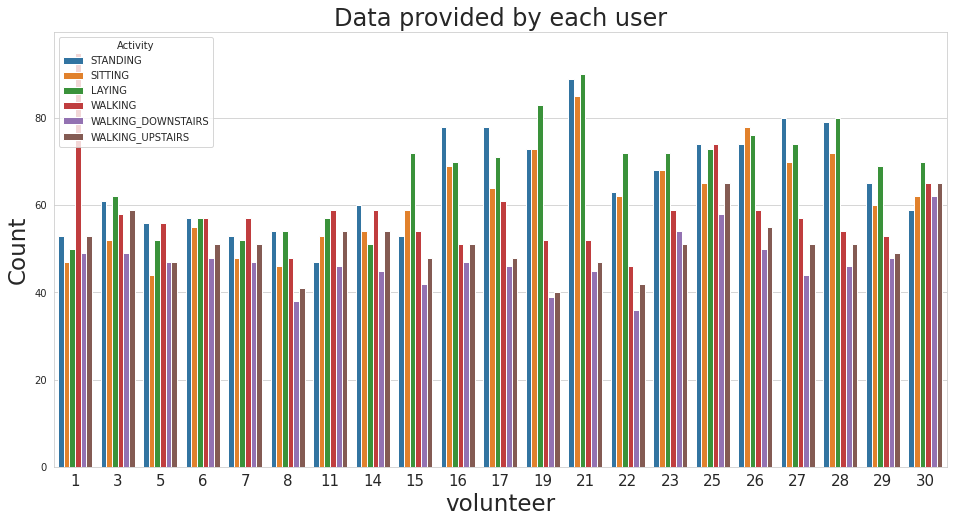

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
sns.color_palette("tab10")
plt.title('Data provided by each user', fontsize=24)
sns.countplot(x='subject',hue='Activity', data = train_data)
plt.xlabel("volunteer", size=23)
plt.ylabel("Count", size=23)
plt.xticks(size=15)
plt.show()

## Visualizing distribution of Stationary and Moving activities

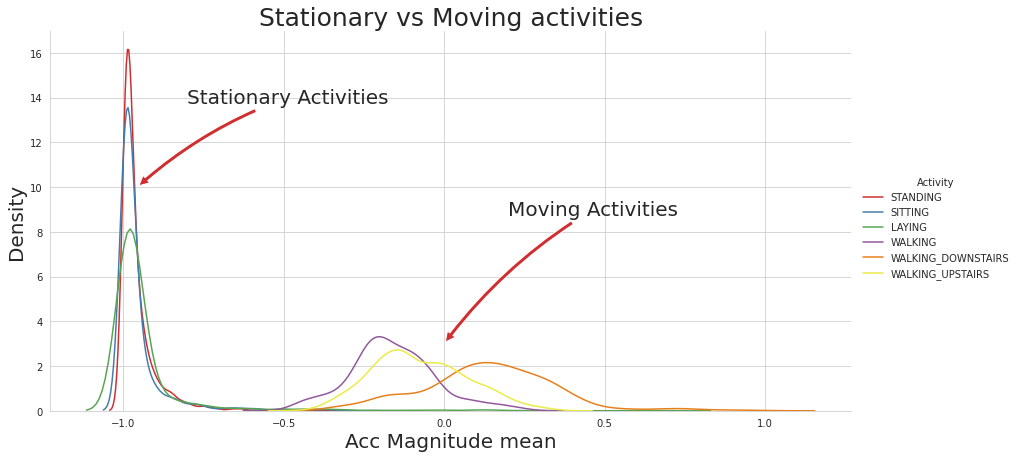

In [11]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train_data, hue='Activity', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,10), xytext=(-0.8, 14), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.title('Stationary vs Moving activities', fontsize=25)
plt.xlabel("Acc Magnitude mean", size=20)
plt.ylabel('Density', size=20)
plt.show()

##  classifying activities into static  ❌ dynamic  

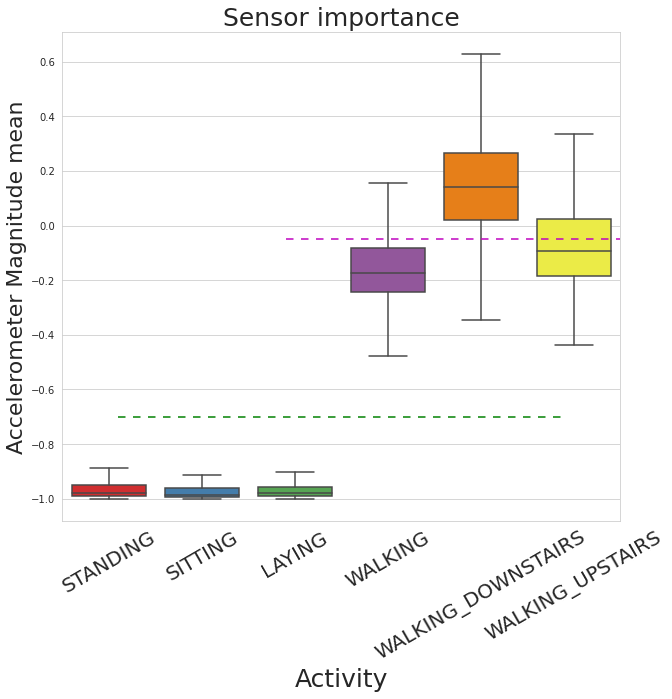

In [12]:
plt.figure(figsize=(10,9))
sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=train_data, showfliers=False, saturation=1)
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.title("Sensor importance", fontsize = 25)
plt.xlabel("Activity", size=25)
plt.ylabel('Accelerometer Magnitude mean', size=22)
plt.xticks(rotation=30, fontsize=20)
plt.show()

**Observations**:

* If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
* If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
* If tAccMean > 0.0 then the Activity is WalkingDownstairs.
* As we saw the activities were splitted into 2 groups as we wanted

## checking imbalance

In [13]:
fig = px.pie(train_data, names='Activity',width=980)
fig.update_layout(
    title={
        'text': "Activities distribution in the data",
        'y':0.95,
        'x':0.40,
        'xanchor': 'center',
        'yanchor': 'top'},
         legend_title ="Activities",
         font=dict(
         family="Arial",
         size=18))
fig.show()

**conclusion**
* we have balanced data and will not do re-sampling

In [14]:
columns = train_data.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train_data.columns = columns
test_data.columns = columns

## Visualizing data after reducing dimentions with T-SNE

T-distributed stochastic neighbor embedding (t-SNE) is a statistical method for visualizing high-dimensional data by giving each datapoint a location in a two or three-dimensional map. It is based on Stochastic Neighbor Embedding originally developed by Sam Roweis and Geoffrey Hinton, where Laurens van der Maaten proposed the t-distributed variant.It is a nonlinear dimensionality reduction technique well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions. 

<img src=https://miro.medium.com/max/689/0*cMaHujI0QQdPqrXe width=500>

Specifically, it models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability. 

The t-SNE algorithm comprises two main stages. First, t-SNE constructs a probability distribution over pairs of high-dimensional objects in such a way that similar objects are assigned a higher probability while dissimilar points are assigned a lower probability. Second, t-SNE defines a similar probability distribution over the points in the low-dimensional map, and it minimizes the Kullback–Leibler divergence (KL divergence) between the two distributions with respect to the locations of the points in the map. While the original algorithm uses the Euclidean distance between objects as the base of its similarity metric, this can be changed as appropriate. 

In [15]:
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.003s...
[t-SNE] Computed neighbors for 7352 samples in 1.576s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.161s
[t-SNE] Iteration 50: error = 96.3448944, gradient norm = 0.0324235 (50 iterations in 1.976s)
[t-SNE] Iteration 100: error = 83.9043732, gradient norm = 0.0072393 (50 iterations in 1.729s)
[t-SNE] Iteration 150: error = 81.8195877, gradient norm = 0

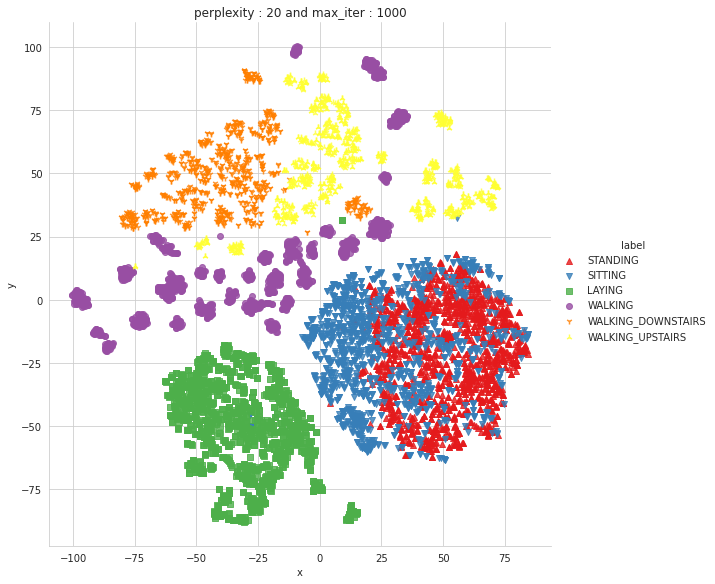

Done


In [16]:
X_pre_tsne = train_data.drop(['subject', 'Activity'], axis=1)
y_pre_tsne = train_data['Activity']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[20])

### Principal Component Analysis

Principal component analysis, or PCA, is a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset. The features are selected on the basis of variance that they cause in the output. The feature that causes highest variance is the first principal component. The feature that is responsible for second highest variance is considered the second principal component, and so on. It is important to mention that principal components do not have any correlation with each other.

<img src = https://hands-on.cloud/wp-content/uploads/2022/02/Implementing-Principal-component-analysis-PCA-using-Python.png width = "600"/>

#### Advantages of PCA

There are two main advantages of dimensionality reduction with PCA.

* The training time of the algorithms reduces significantly with less number of features.
* It is not always possible to analyze data in high dimensions. For instance if there are 100 features in a dataset. Total number of scatter plots required to visualize the data would be 100(100-1)2 = 4950. Practically it is not possible to analyze data this way.


In [17]:
data = pd.concat([train_data, test_data])
data = train_data.sample(frac=1)
f_df = data.loc[:, data.columns.str.contains('^f|^s|^a|^A')]
t_df = data.loc[:, data.columns.str.contains('^t|^s|^a|^A')]

X = data.drop(['subject', 'Activity'], axis=1)
y = data['Activity']

X_f = f_df.drop(['subject', 'Activity'], axis=1)
y_f = f_df['Activity']

X_t = t_df.drop(['subject', 'Activity'], axis=1)
y_t = t_df['Activity']


pca = PCA(n_components=0.99)
pca.fit(X)
x_reduced = pca.transform(X)

print('Frequency components number is {} Time components number is {}'.format(X_f.shape[1], X.shape[1] - X_f.shape[1]))
print('Original number of features {} Reduced number of features {}'.format(X.shape[1], x_reduced.shape[1]))

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_reduced, y, test_size=0.2, shuffle=True, random_state=42)
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=0.2, shuffle=True, random_state=42)
x_train_t, x_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t, test_size=0.2, shuffle=True, random_state=42)

Frequency components number is 296 Time components number is 265
Original number of features 561 Reduced number of features 155


## Modeling

The process of modeling means training a machine learning algorithm to predict the labels from the features, tuning it for the business need, and validating it on holdout data. The output from modeling is a trained model that can be used for inference, making predictions on new data points.

<img src="https://docs.microsoft.com/en-us/windows/ai/images/winml-model-flow.png" width="600"/>

A machine learning model itself is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data.
Once you have trained the model, you can use it to reason over data that it hasn't seen before, and make predictions about those data. For example, let's say you want to build an application that can recognize a user's emotions based on their facial expressions. You can train a model by providing it with images of faces that are each tagged with a certain emotion, and then you can use that model in an application that can recognize any user's emotion

In [18]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train), average='micro')
    test_precision = metrics.precision_score(y_test, model.predict(X_test), average='micro')
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train), average='micro')
    test_recall = metrics.recall_score(y_test, model.predict(X_test), average='micro')
    
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))
    
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'DOWNSTAIRS',
       'UPSTAIRS'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)



```
# This is formatted as code
```

## Logistic Regression

## Logistic Regression
This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. This is also commonly known as the log odds, or the natural logarithm of odds, and this logistic function is represented by the following formulas:

<img src = https://miro.medium.com/max/888/1*D4CIwT2zRCcVq88iji6qYQ.png />

In this logistic regression equation, h is the dependent or response variable and x is the independent variable. The beta parameter, or coefficient, in this model is commonly estimated via maximum likelihood estimation (MLE). This method tests different values of beta through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimate. Once the optimal coefficient (or coefficients if there is more than one independent variable) is found, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability. For binary classification, a probability less than .5 will predict 0 while a probability greater than 0 will predict 1.  After the model has been computed, it’s best practice to evaluate the how well the model predicts the dependent variable, which is called goodness of fit. 

#### Binary logistic regression:

In this approach, the response or dependent variable is dichotomous in nature—i.e. it has only two possible outcomes (e.g. 0 or 1). Some popular examples of its use include predicting if an e-mail is spam or not spam or if a tumor is malignant or not malignant. Within logistic regression, this is the most commonly used approach, and more generally, it is one of the most common classifiers for binary classification.

#### Multinomial logistic regression:

In this type of logistic regression model, the dependent variable has three or more possible outcomes; however, these values have no specified order.  For example, movie studios want to predict what genre of film a moviegoer is likely to see to market films more effectively. A multinomial logistic regression model can help the studio to determine the strength of influence a person's age, gender, and dating status may have on the type of film that they prefer. The studio can then orient an advertising campaign of a specific movie toward a group of people likely to go see it.

Training Accuracy Logistic Regression 99.14980445502466  Test Accuracy Logistic Regression 98.77634262406526
Training Precesion Logistic Regression 99.14980445502466  Test Precesion Logistic Regression 98.77634262406526
Training Recall Logistic Regression 99.14980445502466  Test Recall Logistic Regression 98.77634262406526


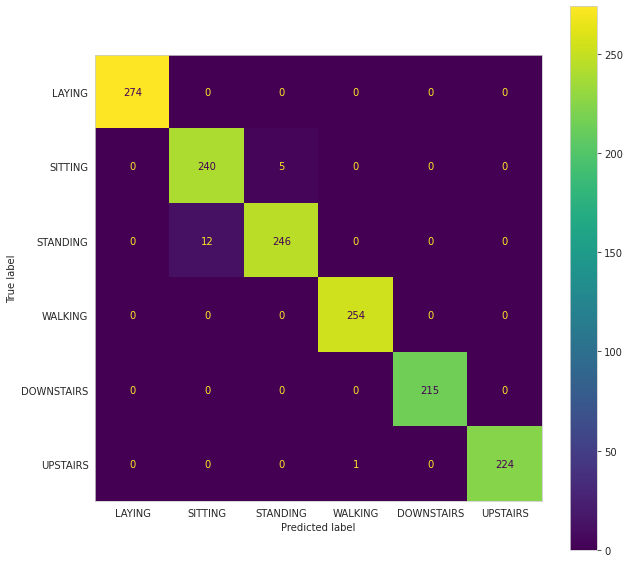

In [19]:
lr = LogisticRegression().fit(x_train, y_train)
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

## Linear Discriminant Analysis

Linear Discriminant Analysis or Normal Discriminant Analysis or Discriminant Function Analysis is a dimensionality reduction technique that is commonly used for supervised classification problems. It is used for modelling differences in groups i.e. separating two or more classes. It is used to project the features in higher dimension space into a lower dimension space. 
For example, we have two classes and we need to separate them efficiently. Classes can have multiple features. Using only a single feature to classify them may result in some overlapping as shown in the below figure. So, we will keep on increasing the number of features for proper classification. 

<img src = https://media.geeksforgeeks.org/wp-content/uploads/20190421212201/lda2.jpg width = 400/>

Here, Linear Discriminant Analysis uses both the axes (X and Y) to create a new axis and projects data onto a new axis in a way to maximize the separation of the two categories and hence, reducing the 2D graph into a 1D graph. 
 

Two criteria are used by LDA to create a new axis: 

* Maximize the distance between means of the two classes.
* Minimize the variation within each class.

<img src=https://media.geeksforgeeks.org/wp-content/uploads/20190423132455/ldanewaxis.jpg width=400/>

In the above graph, it can be seen that a new axis (in red) is generated and plotted in the 2D graph such that it maximizes the distance between the means of the two classes and minimizes the variation within each class. In simple terms, this newly generated axis increases the separation between the data points of the two classes. After generating this new axis using the above-mentioned criteria, all the data points of the classes are plotted on this new axis and are shown in the figure given below. 

Training Accuracy LinearDiscriminantAnalysis 98.62268321713994  Test Accuracy LinearDiscriminantAnalysis 98.57239972807615
Training Precesion LinearDiscriminantAnalysis 98.62268321713994  Test Precesion LinearDiscriminantAnalysis 98.57239972807615
Training Recall LinearDiscriminantAnalysis 98.62268321713994  Test Recall LinearDiscriminantAnalysis 98.57239972807615


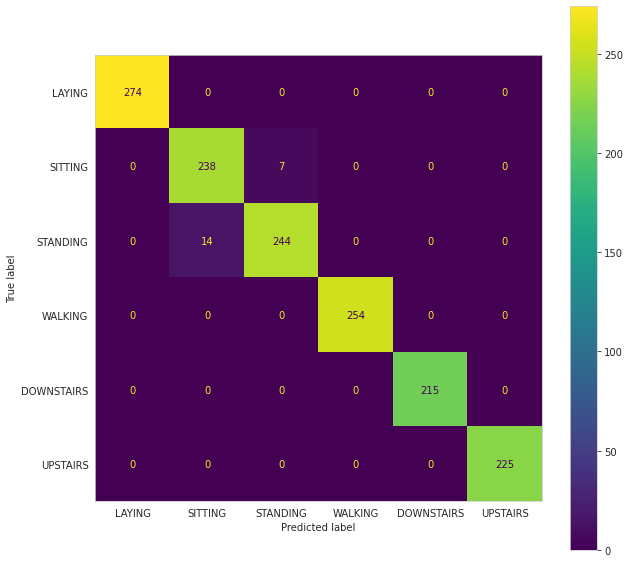

In [20]:
lda = LinearDiscriminantAnalysis().fit(x_train, y_train)
evaluate_classification(lda, "LinearDiscriminantAnalysis", x_train, x_test, y_train, y_test)

##  k-nearest neighbors
The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.

<img src = https://miro.medium.com/max/1400/1*56MmutHmr4WzDJrufP8kug.png width = 600/>

### Determine your distance metrics

In order to determine which data points are closest to a given query point, the distance between the query point and the other data points will need to be calculated. These distance metrics help to form decision boundaries, which partitions query points into different regions. You commonly will see decision boundaries visualized with Voronoi diagram.

<img src = https://i.stack.imgur.com/JKtab.png/>

Training Accuracy KNeighborsClassifier 95.5449753443292  Test Accuracy KNeighborsClassifier 95.03738953093134
Training Precesion KNeighborsClassifier 95.5449753443292  Test Precesion KNeighborsClassifier 95.03738953093134
Training Recall KNeighborsClassifier 95.5449753443292  Test Recall KNeighborsClassifier 95.03738953093134


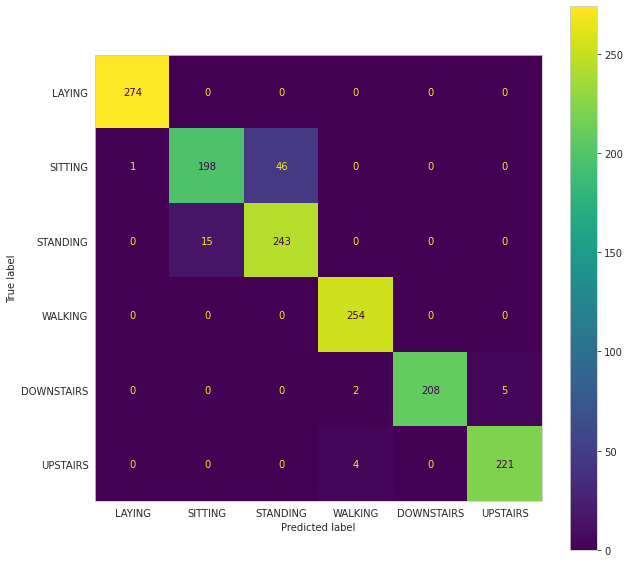

In [21]:
knn = KNeighborsClassifier(n_neighbors=30).fit(x_train, y_train)
evaluate_classification(knn, "KNeighborsClassifier", x_train, x_test, y_train, y_test)

## Naive Bayes
Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle. Every pair of features being classified is independent of each other.
The assumptions made by Naive Bayes are not generally correct in real-world situations. In-fact, the independence assumption is never correct but often works well in practice.

Now, it is important to know about Bayes’ theorem.

### Bayes’ Theorem

Bayes’ Theorem finds the probability of an event occurring given the probability of another event that has already occurred. Bayes’ theorem is stated mathematically as the following equation:

<img src = https://hands-on.cloud/wp-content/uploads/2022/01/Implementing-Naive-Bayes-Classification-using-Python.png width=600/>

where A and B are events and P(B) ≠ 0.

* Basically, we are trying to find probability of event A, given the event B is true. Event B is also termed as evidence.
* P(A) is the priori of A (the prior probability, i.e. Probability of event before evidence is seen). The evidence is an attribute value of an unknown instance(here, it is event B).
* P(A|B) is a posteriori probability of B, i.e. probability of event after evidence is seen.

Training Accuracy GaussianNB 66.28124468627784  Test Accuracy GaussianNB 66.82528891910266
Training Precesion GaussianNB 66.28124468627784  Test Precesion GaussianNB 66.82528891910266
Training Recall GaussianNB 66.28124468627784  Test Recall GaussianNB 66.82528891910266


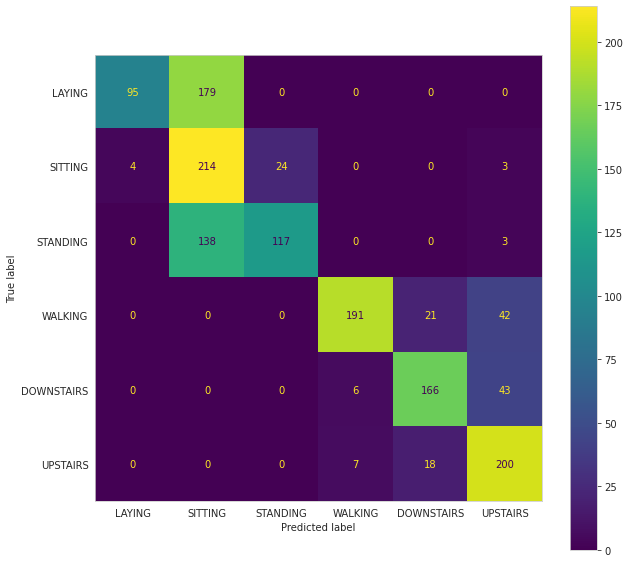

In [22]:
gnb = GaussianNB().fit(x_train, y_train)
evaluate_classification(gnb, "GaussianNB", x_train, x_test, y_train, y_test)

## Support Vector Machines

Support Vector Machine (SVM) is a relatively simple Supervised Machine Learning Algorithm used for classification and/or regression. It is more preferred for classification but is sometimes very useful for regression as well. Basically, SVM finds a hyper-plane that creates a boundary between the types of data. In 2-dimensional space, this hyper-plane is nothing but a line. In SVM, we plot each data item in the dataset in an N-dimensional space, where N is the number of features/attributes in the data. Next, find the optimal hyperplane to separate the data. So by this, you must have understood that inherently, SVM can only perform binary classification (i.e., choose between two classes). However, there are various techniques to use for multi-class problems. Support Vector Machine for Multi-CLass Problems To perform SVM on multi-class problems, we can create a binary classifier for each class of the data. The two results of each classifier will be :

* The data point belongs to that class OR
* The data point does not belong to that class.

<img src=https://lh5.googleusercontent.com/Fqswkk7bY0_7EhTgbPWNOexWWzzDplNKYc1bJl6MI_edNVdwXnWI5xkoSyl7SxFHLLAWlW1AIEhWF2ilVvThzuU0HoPBNF79HsPezpXnKTv3DCFnD9ZeVPLmR828_JXpv5cB35TL width=600/>

For example, in a class of fruits, to perform multi-class classification, we can create a binary classifier for each fruit. For say, the ‘mango’ class, there will be a binary classifier to predict if it IS a mango OR it is NOT a mango. The classifier with the highest score is chosen as the output of the SVM. SVM for complex (Non Linearly Separable) SVM works very well without any modifications for linearly separable data. Linearly Separable Data is any data that can be plotted in a graph and can be separated into classes using a straight line.

We use Kernelized SVM for non-linearly separable data. Say, we have some non-linearly separable data in one dimension. We can transform this data into two dimensions and the data will become linearly separable in two dimensions. This is done by mapping each 1-D data point to a corresponding 2-D ordered pair. So for any non-linearly separable data in any dimension, we can just map the data to a higher dimension and then make it linearly separable. This is a very powerful and general transformation. A kernel is nothing but a measure of similarity between data points. The kernel function in a kernelized SVM tells you, that given two data points in the original feature space, what the similarity is between the points in the newly transformed feature space. There are various kernel functions available, but two are very popular :

* Radial Basis Function Kernel (RBF): The similarity between two points in the transformed feature space is an exponentially decaying function of the distance between the vectors and the original input space as shown below. RBF is the default kernel used in SVM.

* Polynomial Kernel: The Polynomial kernel takes an additional parameter, ‘degree’ that controls the model’s complexity and computational cost of the transformation

Training Accuracy Linear SVC(LBasedImpl) 99.64291787111036  Test Accuracy Linear SVC(LBasedImpl) 98.84432358939496
Training Precesion Linear SVC(LBasedImpl) 99.64291787111036  Test Precesion Linear SVC(LBasedImpl) 98.84432358939496
Training Recall Linear SVC(LBasedImpl) 99.64291787111036  Test Recall Linear SVC(LBasedImpl) 98.84432358939496


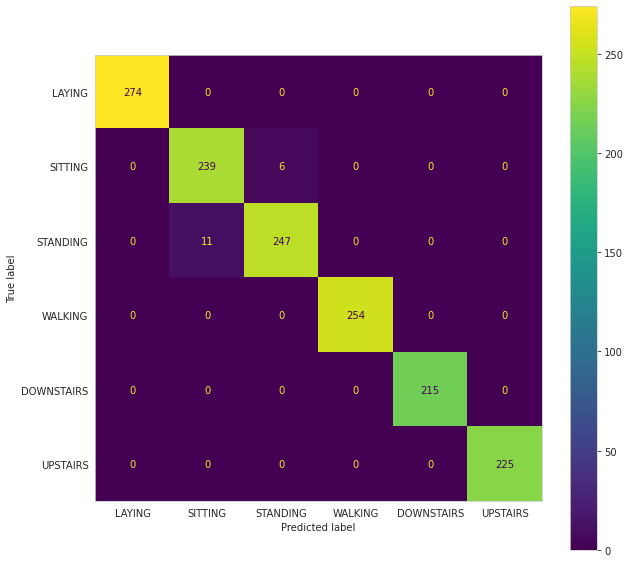

In [23]:
lin_svc = svm.LinearSVC().fit(x_train, y_train)
evaluate_classification(lin_svc, "Linear SVC(LBasedImpl)", x_train, x_test, y_train, y_test)

Training Accuracy RBF SVC 97.68746811766707  Test Accuracy RBF SVC 97.48470428280082
Training Precesion RBF SVC 97.68746811766707  Test Precesion RBF SVC 97.48470428280082
Training Recall RBF SVC 97.68746811766707  Test Recall RBF SVC 97.48470428280082


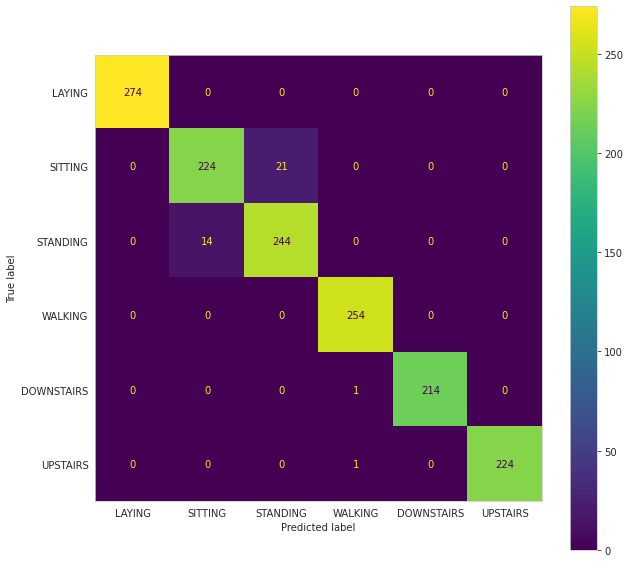

In [24]:
rbf = svm.SVC(kernel='rbf').fit(x_train, y_train)
evaluate_classification(rbf, "RBF SVC", x_train, x_test, y_train, y_test)

## Decision Tree
Decision Tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart-like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. 

<img src= https://www.mastersindatascience.org/wp-content/uploads/sites/54/2022/05/tree-graphic.jpg width=500/>

A tree can be “learned” by splitting the source set into subsets based on an attribute value test. This process is repeated on each derived subset in a recursive manner called recursive partitioning. The recursion is completed when the subset at a node all has the same value of the target variable, or when splitting no longer adds value to the predictions.Decision trees classify instances by sorting them down the tree from the root to some leaf node, which provides the classification of the instance. An instance is classified by starting at the root node of the tree, testing the attribute specified by this node, then moving down the tree branch corresponding to the value of the attribute as shown in the above figure. This process is then repeated for the subtree rooted at the new node. 
The decision tree in above figure classifies a particular morning according to whether it is suitable for playing tennis and returning the classification associated with the particular leaf.(in this case Yes or No). 

Training Accuracy DecisionTreeClassifier 100.0  Test Accuracy DecisionTreeClassifier 94.28959891230456
Training Precesion DecisionTreeClassifier 100.0  Test Precesion DecisionTreeClassifier 94.28959891230456
Training Recall DecisionTreeClassifier 100.0  Test Recall DecisionTreeClassifier 94.28959891230456


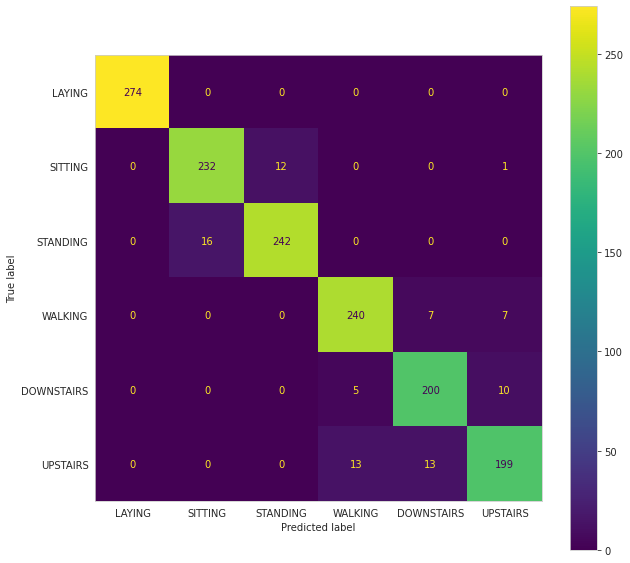

In [25]:
tdt = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

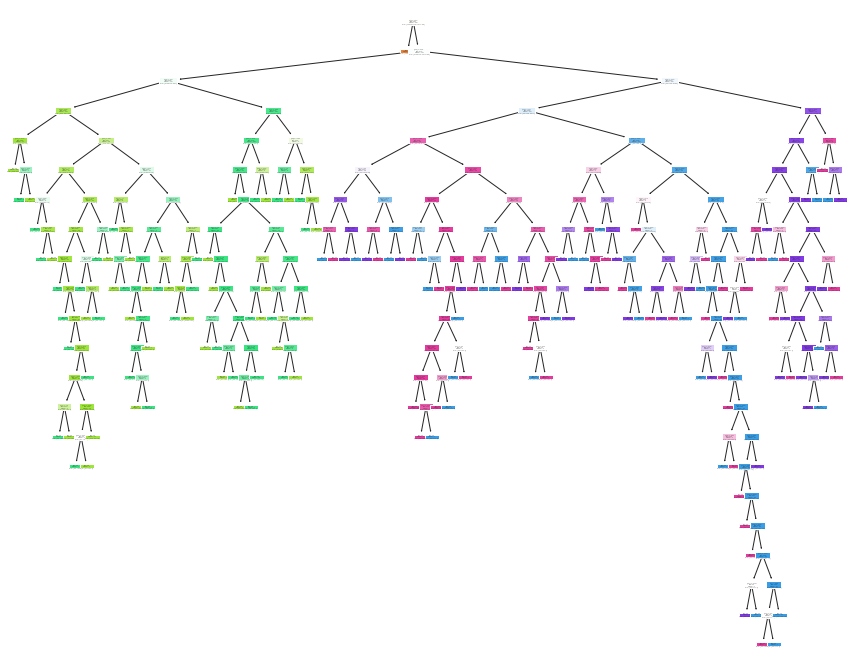

In [26]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(tdt , filled=True)
plt.show()

## RandomForest Classifier

<img src=https://www.researchgate.net/publication/354354484/figure/fig4/AS:1080214163595269@1634554534720/Illustration-of-random-forest-trees.jpg width=600/>

Random forest is a supervised learning algorithm. The “forest” it builds is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.One big advantage of random forest is that it can be used for both classification and regression problems, which form the majority of current machine learning systems. and It also resists overfitting found in decision trees.

Training Accuracy RandomForestClassifier 100.0  Test Accuracy RandomForestClassifier 97.62066621346023
Training Precesion RandomForestClassifier 100.0  Test Precesion RandomForestClassifier 97.62066621346023
Training Recall RandomForestClassifier 100.0  Test Recall RandomForestClassifier 97.62066621346023


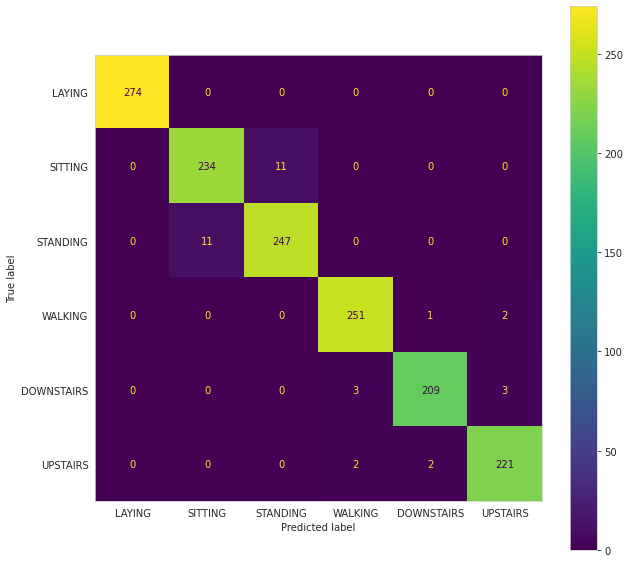

In [27]:
rf = RandomForestClassifier().fit(x_train, y_train)
evaluate_classification(rf, "RandomForestClassifier", x_train, x_test, y_train, y_test)

## XGBOOST Classifier 

<img src=https://miro.medium.com/max/777/1*l4PN8hyAO4fMLxUbIxcETA.png width=500/>

Unlike many other algorithms, XGBoost is an ensemble learning algorithm meaning that it combines the results of many models, called base learners to make a prediction.

The trees used by XGBoost are a bit different than traditional decision trees. They are called CART trees (Classification and Regression trees) and instead of containing a single decision in each “leaf” node, they contain real-value scores of whether an instance belongs to a group. After the tree reaches max depth, the decision can be made by converting the scores into categories using a certain threshold.

Training Accuracy XGBClassifier 98.92875361333107  Test Accuracy XGBClassifier 97.55268524813052
Training Precesion XGBClassifier 98.92875361333107  Test Precesion XGBClassifier 97.55268524813052
Training Recall XGBClassifier 98.92875361333107  Test Recall XGBClassifier 97.55268524813052


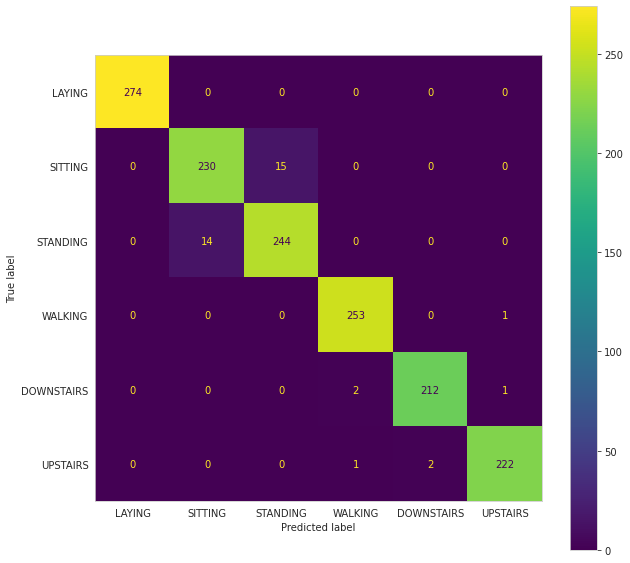

In [28]:
le = preprocessing.LabelEncoder().fit(y_train)
y_xgb_train = le.transform(y_train)
y_xgb_test = le.transform(y_test)

xgb_params = {'n_estimators': 100,
              'learning_rate': 0.2,
              'subsample': 0.927,
              'colsample_bytree': 0.88,
              'max_depth': 5,
              'booster': 'gbtree', 
              'reg_lambda': 38,
              'reg_alpha': 32,
              'random_state': 12}
xgb = XGBClassifier(**xgb_params).fit(x_train, y_xgb_train)
evaluate_classification(xgb, "XGBClassifier", x_train, x_test, y_xgb_train, y_xgb_test)

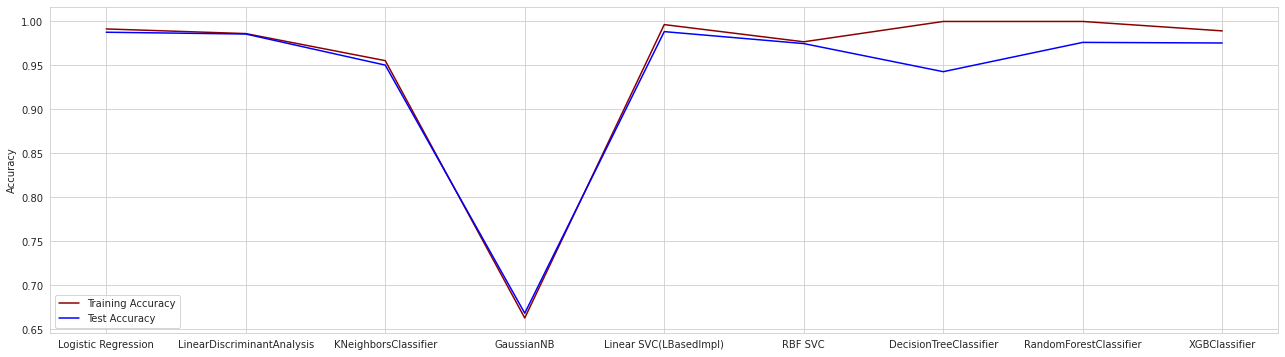

In [29]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(22, 6))
ax.plot(np.arange(len(keys)) , [value[0] for value in values], color='darkred')
ax.plot(np.arange(len(keys)) , [value[1] for value in values], color='b')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.show()

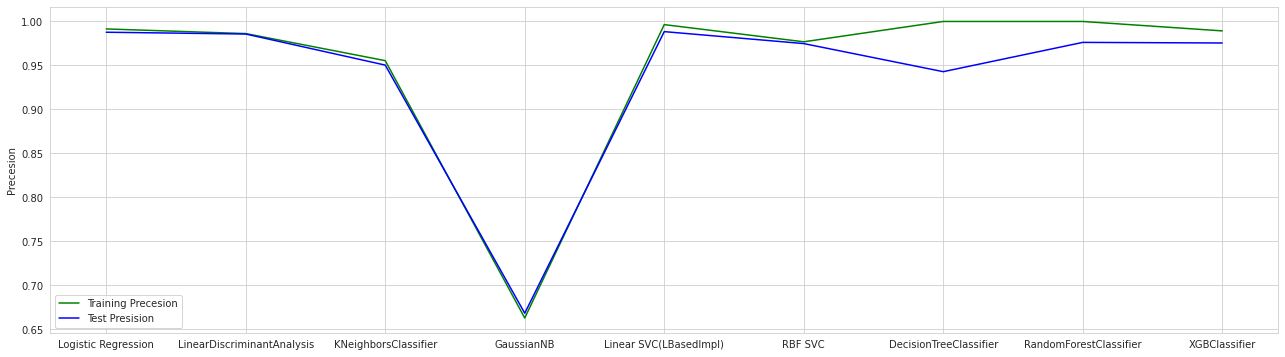

In [30]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(22, 6))
ax.plot(np.arange(len(keys)), [value[2] for value in values], color='g')
ax.plot(np.arange(len(keys)), [value[3] for value in values], color='b')
ax.legend(["Training Precesion", "Test Presision"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Precesion")
plt.show()

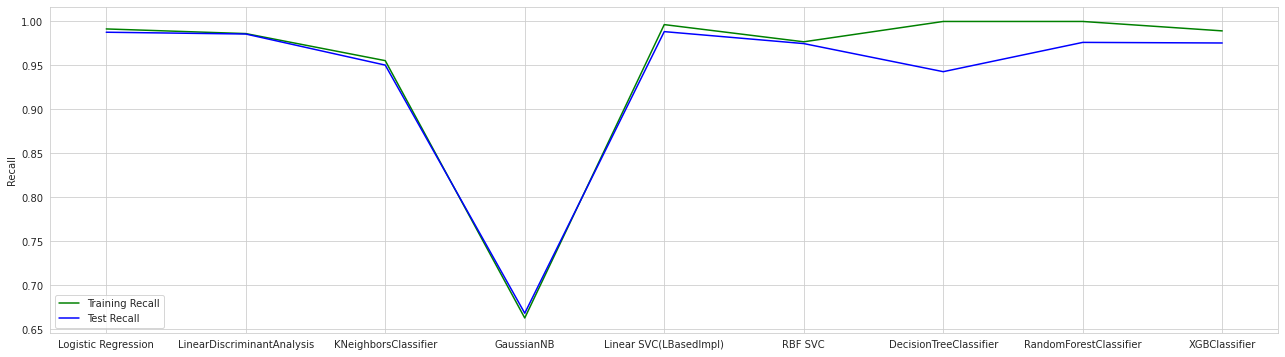

In [31]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(22, 6))
ax.plot(np.arange(len(keys)), [value[4] for value in values], color='g')
ax.plot(np.arange(len(keys)), [value[5] for value in values], color='b')
ax.legend(["Training Recall", "Test Recall"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Recall")
plt.show()

From the evaluation comparison we can clearly see that the linear SVC model is the best one that's why we will be using it to validate and deduce which components are better to be used.

## Feature reduction with PCA vs. manual way

Training Accuracy Linear SVC(PCA) 99.2518279204217  Test Accuracy Linear SVC(PCA) 98.84432358939496
Training Precesion Linear SVC(PCA) 99.2518279204217  Test Precesion Linear SVC(PCA) 98.84432358939496
Training Recall Linear SVC(PCA) 99.2518279204217  Test Recall Linear SVC(PCA) 98.84432358939496


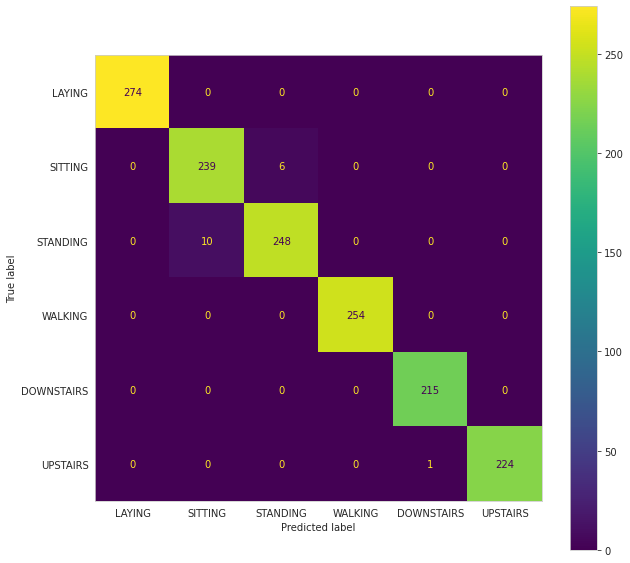

In [32]:
lin_svc_pca = svm.LinearSVC().fit(x_train_pca, y_train_pca)
evaluate_classification(lin_svc_pca, "Linear SVC(PCA)", x_train_pca, x_test_pca, y_train_pca, y_test_pca)

## Time Domain

A time domain analysis is an analysis of physical signals, mathematical functions, or time series of economic or environmental data, in reference to time. Also, in the time domain, the signal or function's value is understood for all real numbers at various separate instances in the case of discrete-time or the case of continuous-time. Furthermore, an oscilloscope is a tool commonly used to see real-world signals in the time domain.

Moreover, a time-domain graph can show how a signal changes with time, whereas a frequency-domain graph will show how much of the signal lies within each given frequency band over a range of frequencies.

In general, when an analysis uses a unit of time, such as seconds or one of its multiples (minutes or hours) as a unit of measurement, then it is in the time domain. However, whenever an analysis concerns the units like Hertz, then it is in the frequency domain.

## Frequency Domain

Frequency domain is an analysis of signals or mathematical functions, in reference to frequency, instead of time. As stated earlier, a time-domain graph displays the changes in a signal over a span of time, and frequency domain displays how much of the signal exists within a given frequency band concerning a range of frequencies. Also, a frequency-domain representation can include information on the phase shift that must be applied to each sinusoid to be able to recombine the frequency components to recover the original time signal.

<img src=https://proximacentauri360.files.wordpress.com/2012/08/fullscreencapture15-aug-1231554pm.jpg />

Furthermore, you can convert a designated signal or function between the frequency and time domains with a pair of operators called transforms. Moreover, a perfect example of a transform is the <b>Fourier transform</b>. Which converts a time function into an integral of sine-waves of various frequencies or sum, each of which symbolizes a frequency component. The so-called spectrum of frequency components is the frequency-domain depiction of the signal. However, as the name implies, the inverse Fourier transform converts the frequency-domain function back to the time function.

## Time vs. Frequency

Time domain analysis provides the transitory response of a system to be analyzed, and it permits a better understanding of the flow of both mechanical and electrical energies. In general, this includes wave propagation, the structural changes of a system, and electric potential generated by external excitations.

Whereas for the frequency domain, visualization tools such as a spectrum analyzer are commonly in use when visualizing electronic signals. Also, some specialized signal processing techniques make use of transforms, and this results in a joint time-frequency domain. Moreover, the instantaneous frequency is a critical link between the time domain and the frequency domain.

Training Accuracy Linear SVC(Frequency) 97.84050331576263  Test Accuracy Linear SVC(Frequency) 97.14479945615227
Training Precesion Linear SVC(Frequency) 97.84050331576263  Test Precesion Linear SVC(Frequency) 97.14479945615227
Training Recall Linear SVC(Frequency) 97.84050331576263  Test Recall Linear SVC(Frequency) 97.14479945615227


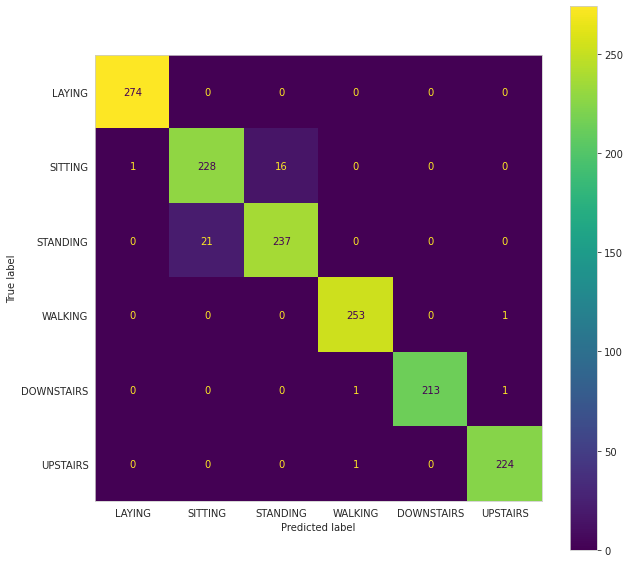

In [33]:
lin_svc_f = svm.LinearSVC().fit(x_train_f, y_train_f)
evaluate_classification(lin_svc_f, "Linear SVC(Frequency)", x_train_f, x_test_f, y_train_f, y_test_f)

Training Accuracy Linear SVC(Time) 99.31984356401972  Test Accuracy Linear SVC(Time) 98.57239972807615
Training Precesion Linear SVC(Time) 99.31984356401972  Test Precesion Linear SVC(Time) 98.57239972807615
Training Recall Linear SVC(Time) 99.31984356401972  Test Recall Linear SVC(Time) 98.57239972807615


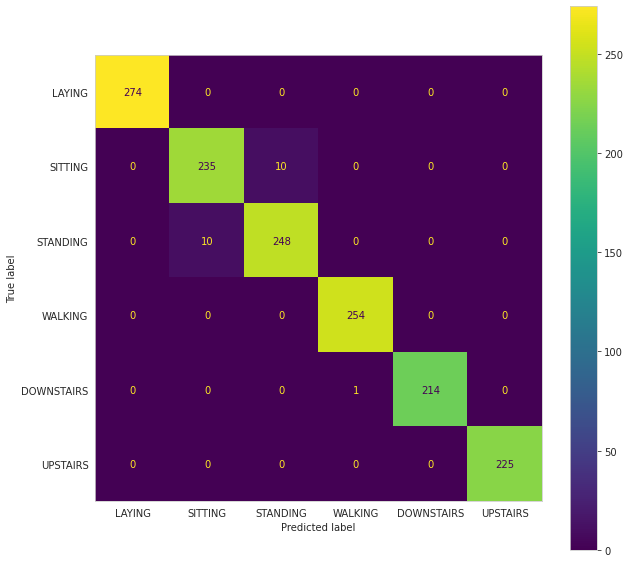

In [34]:
lin_svc_t = svm.LinearSVC().fit(x_train_t, y_train_t)
evaluate_classification(lin_svc_t, "Linear SVC(Time)", x_train_t, x_test_t, y_train_t, y_test_t)

Number of best for Anova is 180
Training Accuracy Linear SVC(K) 98.7757184152355  Test Accuracy Linear SVC(K) 98.30047586675731
Training Precesion Linear SVC(K) 98.7757184152355  Test Precesion Linear SVC(K) 98.30047586675731
Training Recall Linear SVC(K) 98.7757184152355  Test Recall Linear SVC(K) 98.30047586675731


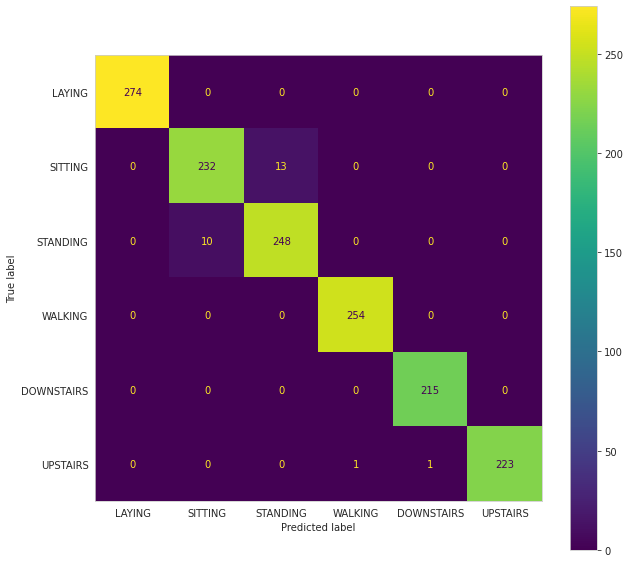

In [35]:
X_f_classif_k = SelectKBest(score_func=f_classif, k=180).fit_transform(X_t,y_t)
print('Number of best for Anova is {}'.format(X_f_classif_k.shape[1]))
x_train_k, x_test_k, y_train_k, y_test_k = train_test_split(X_f_classif_k, y, test_size=0.2, shuffle=True, random_state=42)
lin_svc_k = svm.LinearSVC().fit(x_train_k, y_train_k)
evaluate_classification(lin_svc_k, "Linear SVC(K)", x_train_k, x_test_k, y_train_k, y_test_k)

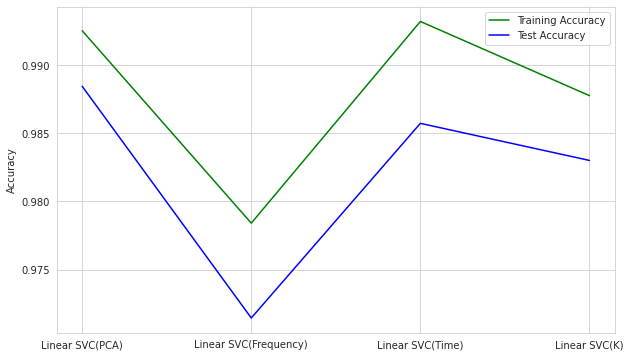

In [36]:
keys = ['Linear SVC(PCA)', 'Linear SVC(Frequency)', 'Linear SVC(Time)', 'Linear SVC(K)']
values = []
for i in keys:
    values.append(kernal_evals[i])
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(len(keys)), [value[0] for value in values], color='g')
ax.plot(np.arange(len(keys)), [value[1] for value in values], color='b')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.show()

## Summary

* Using proper visualizations we could explore the data and extract some insights about it.
* We applied T-SNE dimentionality reduction algorithm to project the high dimentional data into lower human-perceivable dimentions 2-D.
* From the visualization of T-SNE, we could clearly see that the data is linearly seperable and the model would only get confused when classifying SETTING and STANDING positions, but with the suitable modeling algorithm we coul overcome this issue.
* We used three different versions of the data. <b>Full Version</b>, <b>PCA reduced Version</b> and <b>Manually reduced Version</b>
* The Full Version indicated the informativity level of the entire dataset which was used as a bencmark for the next two versions and also to determine the best model for the dataset whch came out to be Linear SVC.
* The PCA reduced Version could maintain about 99% of the data variance using 155 out of 561 features and the performance was acceptable with Training Accuracy 99.23%  Test Accuracy 99.04%.
* The Manually reduced Version came out after comparing performance of time and frequency components and the result was that time components held more generalizable info for the model then we used a feature selection technique using the ANOVA test to maintain the best 180 features out of the 265 time components and the result was Training Accuracy 98.7% Test Accuracy 98.3%.